# Load necessary packages

In [1]:
import pandas as pd 
import numpy as np

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

from termcolor import colored

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Load data

In [2]:
import import_ipynb
from data import create_features

years = [2018]
lags = range(-1, -149, -1)
ID, DA, features = create_features(years, lags)

importing Jupyter notebook from data.ipynb


In [3]:
ID.head(5)

,ID3
Instrument,
2018-01-01 00:00:00,14.586875
2018-01-01 01:00:00,12.990924
2018-01-01 02:00:00,22.150235
2018-01-01 03:00:00,21.917514
2018-01-01 04:00:00,21.621781


In [4]:
DA.head(5)

,MCP
Instrument,
2018-01-01 00:00:00,27.20
2018-01-01 01:00:00,27.30
2018-01-01 02:00:00,30.10
2018-01-01 03:00:00,20.87
2018-01-01 04:00:00,25.56


In [5]:
features.head(5)

,ID3,MCP,ID3 (-1),ID3 (-2),ID3 (-3),ID3 (-4),ID3 (-5),ID3 (-6),ID3 (-7),ID3 (-8),...,ID3 (-139),ID3 (-140),ID3 (-141),ID3 (-142),ID3 (-143),ID3 (-144),ID3 (-145),ID3 (-146),ID3 (-147),ID3 (-148)
Instrument,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,14.586875,27.20,12.990924,22.150235,21.917514,21.621781,22.352647,23.071457,24.345686,25.257541,...,28.133026,25.573566,21.338662,16.894157,13.996110,10.895444,4.704599,4.923619,5.496337,9.487713
2018-01-01 01:00:00,12.990924,27.30,22.150235,21.917514,21.621781,22.352647,23.071457,24.345686,25.257541,25.114449,...,25.573566,21.338662,16.894157,13.996110,10.895444,4.704599,4.923619,5.496337,9.487713,10.044227
2018-01-01 02:00:00,22.150235,30.10,21.917514,21.621781,22.352647,23.071457,24.345686,25.257541,25.114449,24.868167,...,21.338662,16.894157,13.996110,10.895444,4.704599,4.923619,5.496337,9.487713,10.044227,12.999145
2018-01-01 03:00:00,21.917514,20.87,21.621781,22.352647,23.071457,24.345686,25.257541,25.114449,24.868167,25.978476,...,16.894157,13.996110,10.895444,4.704599,4.923619,5.496337,9.487713,10.044227,12.999145,16.051924
2018-01-01 04:00:00,21.621781,25.56,22.352647,23.071457,24.345686,25.257541,25.114449,24.868167,25.978476,26.555409,...,13.996110,10.895444,4.704599,4.923619,5.496337,9.487713,10.044227,12.999145,16.051924,22.510375


# Separate train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    features.drop(labels=['ID3'], axis=1),
    features['ID3'],
    test_size = 0.3,
    random_state = 0,
    shuffle = True)

X_train.shape, X_test.shape

((5551, 149), (2380, 149))

In [7]:
X_train.head(5)

,MCP,ID3 (-1),ID3 (-2),ID3 (-3),ID3 (-4),ID3 (-5),ID3 (-6),ID3 (-7),ID3 (-8),ID3 (-9),...,ID3 (-139),ID3 (-140),ID3 (-141),ID3 (-142),ID3 (-143),ID3 (-144),ID3 (-145),ID3 (-146),ID3 (-147),ID3 (-148)
Instrument,,,,,,,,,,,,,,,,,,,,,
2018-05-03 13:00:00,38.61,42.084034,45.080740,51.122366,52.015268,51.006758,47.733694,44.376636,43.058198,41.689196,...,72.060866,50.615229,47.282028,43.711200,45.261673,47.598988,49.075267,49.155460,48.127858,50.171621
2018-01-26 16:00:00,48.25,48.289236,46.781604,43.841152,39.925535,42.101536,41.918745,40.063780,35.150921,33.951000,...,63.226417,70.535615,63.499484,56.231114,52.288030,53.306764,52.696084,50.771934,48.730095,41.783780
2018-09-11 13:00:00,70.00,69.253482,80.048755,79.505328,77.548151,75.424293,73.588320,61.398192,56.647576,52.113629,...,53.872761,50.743267,56.051835,63.324357,69.422585,73.439432,74.115821,78.781368,79.446161,82.135151
2018-12-16 22:00:00,56.92,67.923885,68.229592,58.184333,58.666775,62.722978,70.149414,74.805337,74.785691,75.115117,...,69.180784,70.461262,67.409818,61.838669,64.747692,59.653026,54.260255,53.110401,42.290105,40.798089
2018-08-27 22:00:00,54.64,51.870694,50.171170,50.948705,54.784392,61.940540,74.031672,87.291319,93.491137,86.833391,...,68.325695,68.329344,69.055205,66.750018,61.526929,58.000790,57.201008,57.674137,64.186213,66.739429


# Random forest

In [8]:
lab_enc = LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

# Visualise

In [10]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True,

In [11]:
X_train.columns[sel_.get_support()]

Index(['MCP', 'ID3 (-1)', 'ID3 (-2)', 'ID3 (-3)', 'ID3 (-4)', 'ID3 (-5)',
       'ID3 (-6)', 'ID3 (-9)', 'ID3 (-11)', 'ID3 (-12)', 'ID3 (-16)',
       'ID3 (-17)', 'ID3 (-21)', 'ID3 (-22)', 'ID3 (-27)', 'ID3 (-29)',
       'ID3 (-31)', 'ID3 (-33)', 'ID3 (-35)', 'ID3 (-39)', 'ID3 (-40)',
       'ID3 (-42)', 'ID3 (-43)', 'ID3 (-45)', 'ID3 (-47)', 'ID3 (-50)',
       'ID3 (-51)', 'ID3 (-57)', 'ID3 (-61)', 'ID3 (-62)', 'ID3 (-65)',
       'ID3 (-66)', 'ID3 (-67)', 'ID3 (-69)', 'ID3 (-70)', 'ID3 (-76)',
       'ID3 (-77)', 'ID3 (-79)', 'ID3 (-82)', 'ID3 (-83)', 'ID3 (-84)',
       'ID3 (-87)', 'ID3 (-88)', 'ID3 (-89)', 'ID3 (-91)', 'ID3 (-92)',
       'ID3 (-93)', 'ID3 (-95)', 'ID3 (-98)', 'ID3 (-99)', 'ID3 (-101)',
       'ID3 (-103)', 'ID3 (-104)', 'ID3 (-108)', 'ID3 (-110)', 'ID3 (-113)',
       'ID3 (-114)', 'ID3 (-115)', 'ID3 (-116)', 'ID3 (-118)', 'ID3 (-121)',
       'ID3 (-125)', 'ID3 (-127)', 'ID3 (-129)', 'ID3 (-131)', 'ID3 (-134)',
       'ID3 (-135)', 'ID3 (-136)', 'ID3 (-137)',

In [12]:
features_selected = X_train.columns[(sel_.get_support())]

len(features_selected)

78

In [13]:
features_selected

Index(['MCP', 'ID3 (-1)', 'ID3 (-2)', 'ID3 (-3)', 'ID3 (-4)', 'ID3 (-5)',
       'ID3 (-6)', 'ID3 (-9)', 'ID3 (-11)', 'ID3 (-12)', 'ID3 (-16)',
       'ID3 (-17)', 'ID3 (-21)', 'ID3 (-22)', 'ID3 (-27)', 'ID3 (-29)',
       'ID3 (-31)', 'ID3 (-33)', 'ID3 (-35)', 'ID3 (-39)', 'ID3 (-40)',
       'ID3 (-42)', 'ID3 (-43)', 'ID3 (-45)', 'ID3 (-47)', 'ID3 (-50)',
       'ID3 (-51)', 'ID3 (-57)', 'ID3 (-61)', 'ID3 (-62)', 'ID3 (-65)',
       'ID3 (-66)', 'ID3 (-67)', 'ID3 (-69)', 'ID3 (-70)', 'ID3 (-76)',
       'ID3 (-77)', 'ID3 (-79)', 'ID3 (-82)', 'ID3 (-83)', 'ID3 (-84)',
       'ID3 (-87)', 'ID3 (-88)', 'ID3 (-89)', 'ID3 (-91)', 'ID3 (-92)',
       'ID3 (-93)', 'ID3 (-95)', 'ID3 (-98)', 'ID3 (-99)', 'ID3 (-101)',
       'ID3 (-103)', 'ID3 (-104)', 'ID3 (-108)', 'ID3 (-110)', 'ID3 (-113)',
       'ID3 (-114)', 'ID3 (-115)', 'ID3 (-116)', 'ID3 (-118)', 'ID3 (-121)',
       'ID3 (-125)', 'ID3 (-127)', 'ID3 (-129)', 'ID3 (-131)', 'ID3 (-134)',
       'ID3 (-135)', 'ID3 (-136)', 'ID3 (-137)',

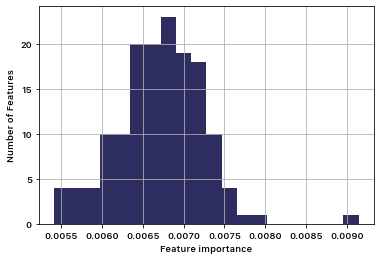

In [14]:
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist(bins=20)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [16]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(features_selected)))

print(
    'features with importance greater than the mean importance of all features: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 149
selected features: 78
features with importance greater than the mean importance of all features: 78
